In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read Prostate data

In [2]:
df = pd.read_csv('data/prostate.data',sep='\t')

In [3]:
df.columns

Index(['Unnamed: 0', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp',
       'gleason', 'pgg45', 'lpsa', 'train'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df_train = df[df['train']=='T'].reset_index(drop=True)
df_test = df[df['train']=='F'].reset_index(drop=True)

## Correlation matrix

In [6]:
corr=df_train.corr()
corr.round(3).style.background_gradient(cmap='coolwarm')

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1,0.3,0.286,0.063,0.593,0.692,0.426,0.483,0.733
lweight,0.3,1,0.317,0.437,0.181,0.157,0.024,0.074,0.485
age,0.286,0.317,1,0.287,0.129,0.173,0.366,0.276,0.228
lbph,0.063,0.437,0.287,1,-0.139,-0.089,0.033,-0.03,0.263
svi,0.593,0.181,0.129,-0.139,1,0.671,0.307,0.481,0.557
lcp,0.692,0.157,0.173,-0.089,0.671,1,0.476,0.663,0.489
gleason,0.426,0.024,0.366,0.033,0.307,0.476,1,0.757,0.342
pgg45,0.483,0.074,0.276,-0.03,0.481,0.663,0.757,1,0.448
lpsa,0.733,0.485,0.228,0.263,0.557,0.489,0.342,0.448,1


# Fit linear model lpsa ~ lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45

## standardized features to have unit variance

In [7]:
from sklearn import preprocessing
feature_list = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

In [8]:
scaler = preprocessing.StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[feature_list]), columns=feature_list)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[feature_list]), columns=feature_list)

df_train_scaled['lpsa'] = df_train['lpsa']
df_test_scaled['lpsa'] = df_test['lpsa']

In [9]:
df_train_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,67.000000
mean,4.308328e-17,-4.971148e-18,-8.343243e-16,6.628197e-18,3.976918e-17,-4.308328e-17,4.921436e-16,-3.314099e-17,2.452345
std,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.207812
min,-2.157304e+00,-2.645075e+00,-3.189126e+00,-1.003472e+00,-5.370862e-01,-8.430840e-01,-1.039499e+00,-9.032532e-01,-0.430783
25%,-6.691190e-01,-6.252199e-01,-5.031242e-01,-1.003472e+00,-5.370862e-01,-8.430840e-01,-1.039499e+00,-9.032532e-01,1.667306
50%,1.251804e-01,-5.798078e-02,3.407614e-02,-8.448679e-02,-5.370862e-01,-4.202897e-01,3.818568e-01,-3.874751e-01,2.568788
75%,8.396889e-01,5.443671e-01,5.712765e-01,1.016091e+00,-5.370862e-01,8.696292e-01,3.818568e-01,8.160072e-01,3.365188
max,2.033202e+00,2.440170e+00,1.914277e+00,1.552196e+00,1.861899e+00,2.065078e+00,3.224568e+00,2.535268e+00,5.477509


In [10]:
df_test_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.095740,0.019378,-0.382254,0.064359,-0.057289,0.081023,0.097586,-0.209818,2.536547
std,0.840554,0.636143,0.945937,0.994212,0.975998,1.016637,1.081828,0.878424,1.042035
min,-1.694681,-1.608889,-2.920526,-1.003472,-0.537086,-0.843084,-1.039499,-0.903253,0.765468
25%,-0.419189,-0.309628,-0.637424,-1.003472,-0.537086,-0.843084,-1.039499,-0.903253,1.864393
50%,0.106276,0.051599,-0.100224,0.252507,-0.537086,-0.155786,0.381857,-0.628172,2.591516
75%,0.599712,0.447602,0.403401,1.033480,-0.537086,0.935755,0.381857,0.300229,2.882004
max,1.750187,1.047216,0.705577,1.445522,1.861899,2.243039,3.224568,2.191416,5.582932


## Fitting linear model: sklearn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression().fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

In [13]:
print(reg.intercept_, reg.coef_)

2.4523450850746267 [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]


## Fitting linear model: statsmodel

In [14]:
formula = 'lpsa ~ ' + ' + '.join(feature_list)
formula

'lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45'

In [15]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = formula, data = df_train_scaled)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.04e-12
Time:                        09:45:22   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4523      0.087     28.182      0.0

In [16]:
squared_error = (ols_result.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
test_error = np.mean(squared_error)
std_error = np.std(squared_error, ddof=1)/np.sqrt(len(df_test_scaled))

In [17]:
df_result = pd.DataFrame(ols_result.params,columns=['LS'])
df_result.loc['test_error'] = test_error
df_result.loc['std_error'] = std_error

In [18]:
df_result

,LS
Intercept,2.452345
lcavol,0.711041
lweight,0.290450
age,-0.141482
lbph,0.210420
svi,0.307300
lcp,-0.286841
gleason,-0.020757
pgg45,0.275268
test_error,0.521274


In [19]:
# Without intercept
import statsmodels.formula.api as smf
ols = smf.ols(formula = formula + ' - 1', data = df_train_scaled)
ols_result = ols.fit()
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   lpsa   R-squared (uncentered):                   0.134
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              1.140
Date:                Sun, 31 May 2020   Prob (F-statistic):                       0.351
Time:                        09:45:25   Log-Likelihood:                         -157.53
No. Observations:                  67   AIC:                                      331.1
Df Residuals:                      59   BIC:                                      348.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Ridge regression: $\min_{b,\beta \in R^p} \|y - X\beta - b\|_2^2 + \alpha \|\beta\|_2^2$

In [20]:
from sklearn.linear_model import Ridge

In [21]:
reg = Ridge(alpha=1.0)
reg.fit(df_train_scaled[feature_list],df_train_scaled['lpsa'])

Ridge()

In [22]:
print(reg.intercept_, reg.coef_)

2.4523450850746267 [ 0.68540969  0.28959545 -0.13430643  0.20841057  0.30162494 -0.25453234
 -0.0112517   0.25598543]


## Step 1: map degree of freedom to regularizer coefficients 

In [23]:
# find all singular values
from sklearn.decomposition import PCA
pca = PCA(n_components = len(feature_list)) 
pca.fit(df_train_scaled[feature_list])
d = pca.singular_values_

In [24]:
def compute_dof(d,lbd):
    '''
        degree of freedom = \sum_i \frac{d_i^2}{d_i^2 + lbd}
    '''
    return (d**2/(d**2+lbd)).sum()

def find_lambda(d, dof_target):
    '''
        Binary search to find lbd that achieves dof_target
    '''
    left = 0
    right = 1e8
    while (right-left>1):
        mid = left + (right-left)/2
        dof = compute_dof(d, mid)
        if dof < dof_target:
            right = mid
        else:
            left = mid
    return mid

In [25]:
alphas = []
for dof in range(9):
    alphas.append(find_lambda(d,dof))

In [26]:
alphas

[99999999.25494194,
 412.0171070098877,
 157.20725059509277,
 78.2310962677002,
 42.46830940246582,
 23.096799850463867,
 11.175870895385742,
 5.21540641784668,
 0.7450580596923828]

## Step 2: Cross Validation to pick the regularization coefficient alpha by “one-standard-error” rule

In [27]:
from sklearn.model_selection import KFold
df = pd.DataFrame()
K=10
kf = KFold(n_splits=K,shuffle=True, random_state=69438)
kf.get_n_splits(df_train_scaled)

for i in range(len(alphas)):
    reg = Ridge(alpha=alphas[i])
    train_mse = []
    test_mse = []
    predict_mse = []
    
    for train_index, test_index in kf.split(df_train_scaled):
        reg.fit(df_train_scaled.loc[train_index][feature_list], df_train_scaled.loc[train_index]['lpsa'])
        train_mse.append(((reg.predict(df_train_scaled.loc[train_index][feature_list]) - df_train_scaled.loc[train_index]['lpsa'])**2).mean())
        test_mse.append(((reg.predict(df_train_scaled.loc[test_index][feature_list]) - df_train_scaled.loc[test_index]['lpsa'])**2).mean())
        predict_mse.append(((reg.predict(df_test_scaled[feature_list])-df_test_scaled['lpsa'])**2).mean())
    
    df = df.append({'dof': i, 'train_mse': np.array(train_mse).mean(), 'test_mse': np.array(test_mse).mean(), 'test_mse_se': np.std(test_mse, ddof=1)/np.sqrt(K), \
                    'predict_mse': np.array(predict_mse).mean()}, ignore_index=True)

Text(0, 0.5, 'CV MSE')

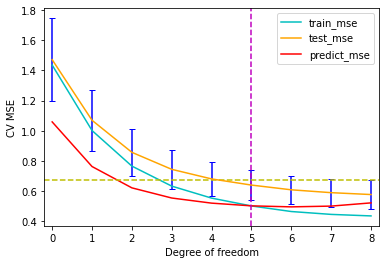

In [28]:
ax = df.plot(x='dof',y='train_mse', color='c')
df.plot(x='dof',y='test_mse', yerr='test_mse_se', color='orange', ax=ax, capsize=3, ecolor='blue')
df.plot(x='dof', y='predict_mse', ax=ax, color='r')
ax.set_xlim(left=-0.2,right=8.2)
idx = df['test_mse'].idxmin()
ax.axhline(y=df.eval('test_mse + test_mse_se').loc[idx], ls='--', color='y')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['dof'].min(), ls='--', color = 'm')
ax.set_xlabel('Degree of freedom')
ax.set_ylabel('CV MSE')

## Step 3: Train full model next using picked alpha value

In [29]:
coef = []
intercept = []
df_testerror = pd.DataFrame()
for i in range(len(alphas)):
    reg = Ridge(alpha=alphas[i])
    
    reg.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    coef.append(list(reg.coef_))
    intercept.append(reg.intercept_)
    
    squared_errors = (reg.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
    df_testerror = df_testerror.append({'dof':i, 'test_error': np.mean(squared_errors), 'std_error': np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))}, ignore_index=True)

In [30]:
df_coef = pd.DataFrame(coef,columns=feature_list)

In [31]:
df_coef['Intercept'] = intercept

In [32]:
df_coef['dof'] = [i for i in range(9)]

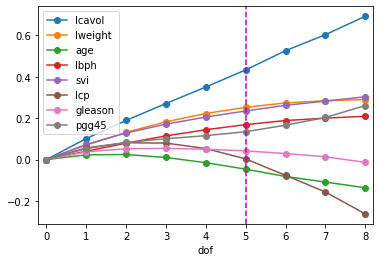

In [33]:
ax = df_coef.drop(columns=['Intercept']).plot(x='dof', marker='o')
ax.set_xlim(left=-0.2,right=8.2)
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['dof'].min(), ls='--', color = 'm')

In [34]:
df_ridgeres = df_coef[df_coef['dof']==5].T.rename(columns={5:'Ridge'})
df_ridgeres.loc['test_error'] = df_testerror.loc[5,'test_error']
df_ridgeres.loc['std_error'] = df_testerror.loc[5,'std_error']
df_ridgeres = df_ridgeres.drop(['dof'])

In [35]:
df_result = pd.concat([df_result,df_ridgeres], axis=1, sort = False)

# Lasso regression: $\min_{b,\beta\in R^p, \|\beta\|_1 \leq t} \|y-X\beta-b\|_2^2$
> Sklearn solves the Lagranian relaxation problem: $\min_{b,\beta\in R^p} \|y-X\beta-b\|_2^2 + \alpha  \|\beta\|_1$

In [36]:
from sklearn.linear_model import Lasso

In [37]:
reg = LinearRegression().fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
reg.coef_

array([ 0.71104059,  0.29045029, -0.14148182,  0.21041951,  0.30730025,
       -0.28684075, -0.02075686,  0.27526843])

In [38]:
np.linalg.norm(reg.coef_, ord=1)

2.24355850754002

In [39]:
lasso = Lasso(alpha=0.0001)
lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

Lasso(alpha=0.0001)

In [40]:
lasso.coef_

array([ 0.71069524,  0.29042003, -0.1413067 ,  0.21030232,  0.30711583,
       -0.28618748, -0.02032945,  0.27461805])

## Step 1: map lasso regularization coef to shrinkage factor

In [41]:
df_map = pd.DataFrame()
baseline = np.linalg.norm(reg.coef_, ord=1)

alphalist = [i/10000.0 for i in range(1,10000)]
for i in alphalist:
    lasso = Lasso(alpha=i)
    lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    df_map = df_map.append({'alpha': i, 'coef_l1': np.linalg.norm(lasso.coef_, ord=1), 'shrinkage_factor': np.linalg.norm(lasso.coef_, ord=1)/baseline}, ignore_index=True)

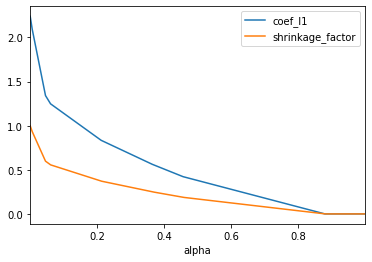

In [42]:
ax = df_map.plot(x='alpha', y='coef_l1')
df_map.plot(x='alpha', y='shrinkage_factor', ax=ax)

In [43]:
alphalist = []
slist = []
for i in range(11):
    target = i/10.0
    slist.append(target)
    alphalist.append(df_map.loc[np.abs(df_map['shrinkage_factor']-target).idxmin()]['alpha'])

In [44]:
alphalist

[0.8789,
 0.6545,
 0.4386,
 0.3021,
 0.1885,
 0.1068,
 0.0452,
 0.0335,
 0.0218,
 0.01,
 0.0001]

## Step2: Cross Validation to pick the regularization coefficient alpha by “one-standard-error” rule

In [45]:
df = pd.DataFrame()
K=10
kf = KFold(n_splits=K,shuffle=True, random_state=69438)
kf.get_n_splits(df_train_scaled)

for i in range(len(alphalist)):
    lasso = Lasso(alpha=alphalist[i])
    train_mse = []
    test_mse = []
    predict_mse = []
    
    for train_index, test_index in kf.split(df_train_scaled):
        lasso.fit(df_train_scaled.loc[train_index][feature_list], df_train_scaled.loc[train_index]['lpsa'])
        train_mse.append(((lasso.predict(df_train_scaled.loc[train_index][feature_list]) - df_train_scaled.loc[train_index]['lpsa'])**2).mean())
        test_mse.append(((lasso.predict(df_train_scaled.loc[test_index][feature_list]) - df_train_scaled.loc[test_index]['lpsa'])**2).mean())
        predict_mse.append(((lasso.predict(df_test_scaled[feature_list])-df_test_scaled['lpsa'])**2).mean())
    
    df = df.append({'shrinkage': slist[i], 'train_mse': np.array(train_mse).mean(), 'test_mse': np.array(test_mse).mean(), 'test_mse_se': np.std(test_mse,ddof=1)/np.sqrt(K), \
                    'predict_mse': np.array(predict_mse).mean()}, ignore_index=True)

Text(0, 0.5, 'CV MSE')

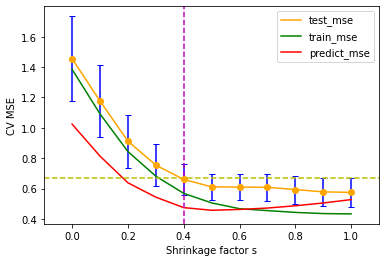

In [46]:
ax = df.plot(x='shrinkage', y='test_mse', yerr='test_mse_se',capsize=3, color='orange', ecolor='blue', marker='o')
df.plot(x='shrinkage', y='train_mse', color='g', ax=ax)
df.plot(x='shrinkage', y='predict_mse', color='r', ax=ax)
ax.set_xlim(left=-0.1, right=1.1)

idx = df['test_mse'].idxmin()
ax.axhline(y=df.eval('test_mse + test_mse_se').loc[idx], ls='--', color='y')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['shrinkage'].min(), ls='--', color = 'm')
ax.set_xlabel('Shrinkage factor s')
ax.set_ylabel('CV MSE')

## Step 3: Train full model using the selected alpha by cross validation

In [47]:
coef = []
intercept = []
df_testerror = pd.DataFrame()
for i in range(len(alphalist)):
    lasso = Lasso(alpha=alphalist[i])
    
    lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    coef.append(list(lasso.coef_))
    intercept.append(lasso.intercept_)
    
    squared_errors = (lasso.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
    df_testerror = df_testerror.append({'shrinkage':slist[i], 'test_error': np.mean(squared_errors), 'std_error': np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))}, ignore_index=True)

In [48]:
intercept

[2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267]

In [49]:
df_coef = pd.DataFrame(coef,columns=feature_list)
df_coef['shrinkage'] = slist

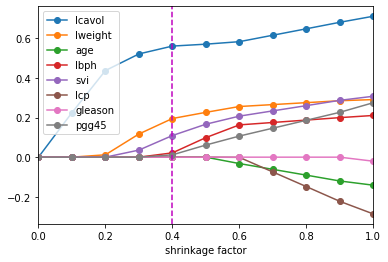

In [50]:
ax = df_coef.plot(x='shrinkage', marker='o')
ax.set_xlabel('shrinkage factor')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['shrinkage'].min(), ls='--', color = 'm')

In [51]:
df_coef['Intercept'] = intercept

df_lassores = df_coef[df_coef['shrinkage']==0.4].T.rename(columns={4:'Lasso'})
df_lassores.loc['test_error'] = df_testerror.loc[4,'test_error']
df_lassores.loc['std_error'] = df_testerror.loc[4,'std_error']
df_lassores = df_lassores.drop(['shrinkage'])

In [53]:
df_result = pd.concat([df_result,df_lassores], axis=1, sort = False)

In [54]:
df_result

,LS,Ridge,Lasso
Intercept,2.452345,2.452345,2.452345
lcavol,0.711041,0.432815,0.560203
lweight,0.290450,0.252017,0.194887
age,-0.141482,-0.046407,0.000000
lbph,0.210420,0.168537,0.021667
svi,0.307300,0.234399,0.109014
lcp,-0.286841,0.002985,0.000000
gleason,-0.020757,0.041893,0.000000
pgg45,0.275268,0.134372,0.011666
test_error,0.521274,0.492480,0.468676


# Subset_selection

## Step 1: Define BestSubsetRegression class as a sklearn base estimator
> Since sklearn doesn't have the module, we define best subset regression class to fit the model overselves. It is derived from BaseEstimator class in sklearn module, so can be used in standard Scikit-learn pipelines and cross-validation.

In [55]:
# reg = BestSubsetRegression(subset_size=2).fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class BestSubsetRegression(BaseEstimator):    
    """ Linear regression based on the best features subset of fixed size.
    Parameters
    ----------
        subset_size :
            The number of features in the subset.
    Examples
    --------
    >>> estimator = BestSubsetRegression(2)
    >>> estimator.fit(X, y)
    """
    
    def __init__(self, subset_size=1):
        #LinearRegression.__init__(self)
        self.subset_size = subset_size
    
    def fit(self, X, y):
        # always check input data first, and specify num of features
        X, y = check_X_y(X, y, accept_sparse=False)
        self.n_features_in_ = X.shape[1]
        subset_size = max(min(int(self.subset_size),self.n_features_in_),0) # subset size should be integer between 0 and feature numbers
        
        if (subset_size==0):
            self.best_coef_ = np.array([])
            self.best_intercept_ = y.mean()
            self.best_mse_ = ((y - y.mean())**2).mean()
            self.best_subset_ = []
            return self
        
        else:
            best_mse_ = None
            best_subset_ = None
            best_coef_ = None
            best_intercept_ = None
            for subset in combinations(range(X.shape[1]),subset_size):
                X_subset = X[:,list(subset)]
                reg = LinearRegression().fit(X_subset,y)
                mse = ((reg.predict(X_subset)-y)**2).mean()
                if best_mse_==None or mse < best_mse_:
                    best_mse_ = mse
                    best_subset_ = list(subset)
                    best_coef_ = reg.coef_
                    best_intercept_ = reg.intercept_

            self.best_coef_, self.best_intercept_ = best_coef_, best_intercept_
            self.best_mse_, self.best_subset_ = best_mse_, best_subset_
            self.is_fitted_ = True
            return self
    
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
        
        X_subset = X[:, self.best_subset_]
        return np.dot(X_subset, self.best_coef_) + self.best_intercept_

In [56]:
# Check if estimator is a valid sklearn estimator so that it can be passed-in in later GridSearchCV pipelines
from sklearn.utils.estimator_checks import check_estimator
check_estimator(BestSubsetRegression)

/Users/yuchenj/learn/playground/env/lib/python3.7/site-packages/sklearn/utils/estimator_checks.py:488: FutureWarning: Passing a class is deprecated since version 0.23 and won't be supported in 0.24.Please pass an instance instead.
  warnings.warn(msg, FutureWarning)


In [57]:
# Sanity check by training the full model, it should have the same results as linear regressor
reg = BestSubsetRegression(subset_size=8).fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

In [58]:
check_estimator(reg)

In [59]:
reg.best_coef_

array([ 0.71104059,  0.29045029, -0.14148182,  0.21041951,  0.30730025,
       -0.28684075, -0.02075686,  0.27526843])

In [60]:
((reg.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2).mean()

0.5212740055076

## Step 2: Cross Validation using GridSearchCV class in sklearn

In [61]:
from sklearn.model_selection import GridSearchCV, KFold
K=10
g = GridSearchCV(BestSubsetRegression(), {'subset_size': [i for i in range(len(feature_list)+1)]},
            cv=KFold(K, shuffle=True, random_state=69438),
            scoring='neg_mean_squared_error',
            return_train_score=True, iid=True)

In [62]:
g.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

/Users/yuchenj/learn/playground/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=KFold(n_splits=10, random_state=69438, shuffle=True),
             estimator=BestSubsetRegression(), iid=True,
             param_grid={'subset_size': [0, 1, 2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='neg_mean_squared_error')

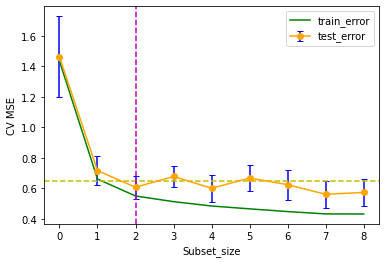

In [63]:
plt.errorbar(g.param_grid['subset_size'],-g.cv_results_['mean_test_score'],yerr=-g.cv_results_['std_test_score']/np.sqrt(K), marker='o', capsize=3,label='test_error', color='orange', ecolor='blue')
plt.plot(g.param_grid['subset_size'],-g.cv_results_['mean_train_score'],label='train_error', color='g')

oneStandardError_test_score = -g.cv_results_['mean_test_score'][g.best_estimator_.subset_size] + g.cv_results_['std_test_score'][g.best_estimator_.subset_size]/np.sqrt(K)
plt.axhline(y = oneStandardError_test_score, ls='--', color='y')
plt.axvline(x = (-g.cv_results_['mean_test_score']<oneStandardError_test_score).argmax(), ls='--', color='m')
plt.xlabel('Subset_size')
plt.ylabel('CV MSE')
plt.legend()

## Step 3: Retrain full model using selected subset sizes

In [64]:
reg = BestSubsetRegression(subset_size=2).fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
print(reg.best_coef_, reg.best_intercept_)

[0.77401717 0.34927407] 2.4523450850746267


In [65]:
squared_errors = (reg.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
test_error = squared_errors.mean()
std_error = np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))

In [66]:
df_bestsubset = pd.DataFrame(reg.best_coef_, [feature_list[i] for i in reg.best_subset_], columns=['best_subset'])
df_bestsubset.loc['test_error'] = test_error
df_bestsubset.loc['std_error'] = std_error
df_bestsubset.loc['Intercept'] = reg.best_intercept_

In [67]:
df_result = pd.concat([df_result,df_bestsubset], axis=1, sort = False).fillna(0)

In [68]:
df_result

,LS,Ridge,Lasso,best_subset
Intercept,2.452345,2.452345,2.452345,2.452345
lcavol,0.711041,0.432815,0.560203,0.774017
lweight,0.290450,0.252017,0.194887,0.349274
age,-0.141482,-0.046407,0.000000,0.000000
lbph,0.210420,0.168537,0.021667,0.000000
svi,0.307300,0.234399,0.109014,0.000000
lcp,-0.286841,0.002985,0.000000,0.000000
gleason,-0.020757,0.041893,0.000000,0.000000
pgg45,0.275268,0.134372,0.011666,0.000000
test_error,0.521274,0.492480,0.468676,0.492482


# Principal Component Regression
> For training data $X_{n*p}$, let $v_k \in R^p$ be the $k$-th principal component direction, $z_k = Xv_k - avg(Xv_k)\in R^n$ is the direction that has the largest sample variance
amongst all normalized linear combinations of the columns of X which is orthogonal to all previous directions $1, 2, \dots, k-1$. The singular values are $d_k = \|z_k\|$.  
> The Principal Component Regression is to regress $y$ on $z_1, \dots, z_m$, for some $m<p$, i.e, $$\mathbf{\hat{y}} =  \bar{y} \mathbf{1} + \sum_{i=1}^m \hat{\theta}_i \mathbf{z_i}.$$ Since $\mathbf{z_i}$ are orthogonal to each other, we have $\hat{\theta}_i = \frac{<z_i, y>}{<z_i, z_i>}$.  
> Mapping to original space, $\hat{\beta} = \sum_{i=1}^m \hat{\theta}_i v_i$

## Step 1: Implement PCR function to return beta coef

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCR(df, feature_list, output_col):
    # find principal components
    x, y = df[feature_list], df[output_col]
    
    pca = PCA(n_components = len(feature_list)) 
    pca.fit(x)
    d = pca.singular_values_
    v = pca.components_
    
    z = pca.fit_transform(x).T
    
    # compute coefficients
    thetas = np.dot(z,y)/(d**2)
    ybars = [np.mean(y)]
    
    betas = [[0 for _ in range(len(feature_list))]]
    for m in range(len(feature_list)):
        betas.append(list(betas[-1]+thetas[m] * v[m]))
        ybars.append(ybars[-1]-np.dot(x, v[m]).mean()*thetas[m]) # re-compute intercept since X might not be centered
    betas = np.array(betas)
    
    return ybars,betas

In [70]:
beta0,betas = PCR(df_train_scaled, feature_list, 'lpsa')

In [71]:
betas

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.18977538,  0.07294251,  0.10486558,  0.01321516,  0.17224992,
         0.20021365,  0.17172686,  0.19418163],
       [ 0.19698013,  0.19899826,  0.1985914 ,  0.15837241,  0.1330765 ,
         0.16226077,  0.15942118,  0.1640579 ],
       [ 0.29613106,  0.33479572,  0.07103   ,  0.13681513,  0.27985354,
         0.23411875, -0.03316913,  0.05253095],
       [ 0.28621553,  0.33695222, -0.06573739,  0.23470027,  0.25447565,
         0.25247067,  0.00253234,  0.10062603],
       [ 0.31507681,  0.28674723, -0.05472296,  0.26823868,  0.25958424,
         0.26134135, -0.01035579,  0.08076792],
       [ 0.43402324,  0.31187656, -0.07728811,  0.21951084,  0.13379538,
         0.27055809,  0.01346759,  0.0515934 ],
       [ 0.5663068 ,  0.32085962, -0.15256804,  0.21438171,  0.31970713,
        -0.05002414,  0.22686072, -0.06314984],
       [ 0.71104059,  0.29045029

In [72]:
beta0

[2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267]

## Step 2: Cross validation to choose desired number of components

In [73]:
df = pd.DataFrame()
K=10
kf = KFold(n_splits=K,shuffle=True,random_state=69438)
kf.get_n_splits(df_train_scaled)
train_mse = []
test_mse = []
predict_mse = []

for train_index, test_index in kf.split(df_train_scaled):
    beta0s,betas = PCR(df_train_scaled.loc[train_index], feature_list, 'lpsa')

    train_mse.append([])
    test_mse.append([])
    predict_mse.append([])
    for m in range(len(betas)):
        train_mse[-1].append(((np.dot(betas[m],df_train_scaled.loc[train_index][feature_list].T)+beta0s[m] - df_train_scaled.loc[train_index]['lpsa'])**2).mean())
        test_mse[-1].append(((np.dot(betas[m],df_train_scaled.loc[test_index][feature_list].T)+beta0s[m] - df_train_scaled.loc[test_index]['lpsa'])**2).mean())
        predict_mse[-1].append(((np.dot(betas[m],df_test_scaled[feature_list].T)+beta0s[m] - df_test_scaled['lpsa'])**2).mean())

df = pd.DataFrame({'num_components': [i for i in range(len(feature_list)+1)], 'train_mse': np.mean(train_mse, axis=0), 'test_mse': np.mean(test_mse, axis=0), 
                'test_mse_se': np.std(test_mse, ddof=1, axis=0)/np.sqrt(K), 'predict_mse': np.mean(predict_mse,axis=0)})

Text(0, 0.5, 'CV MSE')

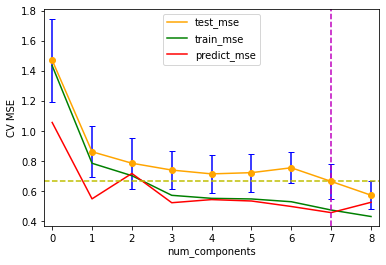

In [74]:
ax = df.plot(x='num_components', y='test_mse', yerr='test_mse_se',capsize=3, color='orange', ecolor='blue',marker='o')
df.plot(x='num_components', y='train_mse', color='g', ax=ax)
df.plot(x='num_components', y='predict_mse', color='r', ax=ax)
ax.set_xlim(left=-0.2, right=8.2)

idx = df['test_mse'].idxmin()
ax.axhline(y=df.eval('test_mse + test_mse_se').loc[idx], ls='--', color='y')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['num_components'].min(), ls='--', color = 'm')
ax.set_xlabel('num_components')
ax.set_ylabel('CV MSE')

In [75]:
df

,num_components,train_mse,test_mse,test_mse_se,predict_mse
0,0,1.435814,1.471813,0.275333,1.058056
1,1,0.786630,0.863364,0.167884,0.550056
2,2,0.704094,0.787020,0.169953,0.718940
3,3,0.573595,0.741485,0.126342,0.524360
4,4,0.553455,0.716156,0.128460,0.545145
5,5,0.549381,0.724272,0.125748,0.535810
6,6,0.530917,0.756797,0.102597,0.499313
7,7,0.475795,0.666069,0.116200,0.458563
8,8,0.432666,0.574335,0.094005,0.527207


# Step 3: Train full model using selected number of components

In [76]:
beta0s,betas = PCR(df_train_scaled, feature_list, 'lpsa')

In [77]:
print(beta0s, betas[-1])

[2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267, 2.4523450850746267] [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]


In [78]:
reg = LinearRegression().fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
print(reg.intercept_, reg.coef_)

2.4523450850746267 [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]


In [79]:
squared_errors = (np.dot(df_test_scaled[feature_list],betas[7])+beta0s[7] - df_test_scaled['lpsa'])**2

In [80]:
test_error = squared_errors.mean()
std_error = np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))

In [81]:
std_error

0.10443722001698953

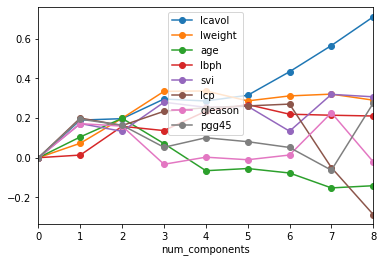

In [82]:
df_coef = pd.DataFrame(betas,columns=feature_list)
df_coef['num_components'] = [i for i in range(9)]
df_coef.plot(x='num_components',marker='o')

In [83]:
df_coef['Intercept'] = beta0

In [84]:
df_pcr = df_coef[df_coef['num_components']==7].T.rename(columns={7:'PCR'})
df_pcr.loc['test_error'] = test_error
df_pcr.loc['std_error'] = std_error
df_pcr = df_pcr.drop(['num_components'])

In [85]:
df_result = pd.concat([df_result,df_pcr], axis=1, sort = False)

In [86]:
df_result

,LS,Ridge,Lasso,best_subset,PCR
Intercept,2.452345,2.452345,2.452345,2.452345,2.452345
lcavol,0.711041,0.432815,0.560203,0.774017,0.566307
lweight,0.290450,0.252017,0.194887,0.349274,0.320860
age,-0.141482,-0.046407,0.000000,0.000000,-0.152568
lbph,0.210420,0.168537,0.021667,0.000000,0.214382
svi,0.307300,0.234399,0.109014,0.000000,0.319707
lcp,-0.286841,0.002985,0.000000,0.000000,-0.050024
gleason,-0.020757,0.041893,0.000000,0.000000,0.226861
pgg45,0.275268,0.134372,0.011666,0.000000,-0.063150
test_error,0.521274,0.492480,0.468676,0.492482,0.448309


### An easier way is to utilize the GridSearchCV class to do cross validation and select desired number of components.
> see here: https://scikit-learn.org/stable/modules/compose.html

In [87]:
# Define model pipeline, first use PCA class to find principal components, and the apply linear regreesion class to fit a linear model
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

PCR_pipe = Pipeline([('pca', PCA()),
                ('regression', LinearRegression())])

In [88]:
PCR_pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA()), ('regression', LinearRegression())],
 'verbose': False,
 'pca': PCA(),
 'regression': LinearRegression(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': None,
 'regression__normalize': False}

In [89]:
params = {'pca__n_components': [i+1 for i in range(len(feature_list))]} # Cannot pass 0 into PCA n_components

In [90]:
from sklearn.model_selection import GridSearchCV
K = 10
g = GridSearchCV(PCR_pipe, params, scoring='neg_mean_squared_error', cv=KFold(n_splits=K,shuffle=True, random_state=69438), return_train_score=True)
g.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

GridSearchCV(cv=KFold(n_splits=10, random_state=69438, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('regression', LinearRegression())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
# Now using DummyRegressor to get 0 component case, i.e., Dummy regressor with intercept only
from sklearn.dummy import DummyRegressor
g0 = GridSearchCV(DummyRegressor(), param_grid={'constant': [None]}, scoring='neg_mean_squared_error', cv=KFold(n_splits=K,shuffle=True, random_state=69438), return_train_score=True)
g0.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

GridSearchCV(cv=KFold(n_splits=10, random_state=69438, shuffle=True),
             estimator=DummyRegressor(), param_grid={'constant': [None]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
# Combine two results from GridSearch
num_components = [0] + g.param_grid['pca__n_components']
mean_test_score = list(-g0.cv_results_['mean_test_score']) + list(-g.cv_results_['mean_test_score'])
mean_train_score = list(-g0.cv_results_['mean_train_score']) + list(-g.cv_results_['mean_train_score'])
se_test_score = list(g0.cv_results_['std_test_score']/np.sqrt(K)) + list((g.cv_results_['std_test_score']/np.sqrt(K)))

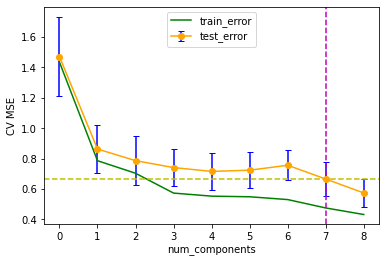

In [93]:
plt.errorbar(num_components, mean_test_score, yerr=se_test_score, capsize=3, label='test_error', color='orange', ecolor='blue', marker='o')
plt.plot(num_components, mean_train_score, label='train_error', color='g')

oneStandardError_test_score = mean_test_score[g.best_index_+1] + se_test_score[g.best_index_+1]
plt.axhline(y = oneStandardError_test_score, ls='--', color='y')
plt.axvline(x = (-g.cv_results_['mean_test_score']<oneStandardError_test_score).argmax(), ls='--', color='m')
plt.xlabel('num_components')
plt.ylabel('CV MSE')
plt.legend()

In [94]:
mean_test_score

[1.4718128795871817,
 0.8633638327249266,
 0.7870203112370902,
 0.7414846099000567,
 0.7161561630932926,
 0.7242719421361915,
 0.7567972436153876,
 0.6660692515663051,
 0.5743347458763434]

In [100]:
# Retrain full model
pipe = Pipeline([('PCA', PCA(n_components=7)), ('regression', LinearRegression())])
pipe.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('regression', LinearRegression())])

In [101]:
masked_array = [0 for _ in range(len(feature_list))]
intercept = pipe.predict([[0,0,0,0,0,0,0,0]])[0]
coef = []
for i in range(len(masked_array)):
    masked_array[i] = 1
    coef.extend(list(pipe.predict([masked_array]) - intercept))
    masked_array[i] = 0

In [102]:
print(intercept, coef)

2.4523450850746262 [0.5663067950477276, 0.32085962285954617, -0.15256804226382492, 0.21438170573184223, 0.3197071330892425, -0.05002414368489161, 0.2268607181670359, -0.06314983973561583]


In [103]:
squared_errors = (pipe.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa']) ** 2
test_error = squared_errors.mean()
std_error = np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))
print(test_error, std_error)

0.44830894405802024 0.1044372200169897
